In [30]:
import json 
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
vocab_size = 10000
embeddings_dim = 16
oov_tok = '<OOV>'
max_length = 32
trucn_type= 'post'
padding_type = 'post'
training_size = 20000

In [32]:
with open('sarcasm.json','r') as f :
    datastore = json.load(f)

In [33]:
sentences = []
labels = []

In [34]:
for item in datastore : 
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [35]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [36]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [37]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,padding=padding_type,truncating=trucn_type,maxlen=max_length)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,padding=padding_type,truncating=trucn_type,maxlen=max_length)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embeddings_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                12312     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 172,337
Trainable params: 172,337
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs=30
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [45]:
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels))

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 [==============================] - 2s 94us/sample - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.4803 - val_accuracy: 0.8556
Epoch 2/30
20000/20000 [==============================] - 2s 83us/sample - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.5600 - val_accuracy: 0.8530
Epoch 3/30
20000/20000 [==============================] - 2s 83us/sample - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.6226 - val_accuracy: 0.8518
Epoch 4/30
20000/20000 [==============================] - 2s 87us/sample - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.6734 - val_accuracy: 0.8520
Epoch 5/30
20000/20000 [==============================] - 2s 76us/sample - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.7213 - val_accuracy: 0.8501
Epoch 6/30
20000/20000 [==============================] - 2s 81us/sample - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.7688 - val_accuracy: 0.8487
Epoch 7/30
20000/20000 [==============================] -

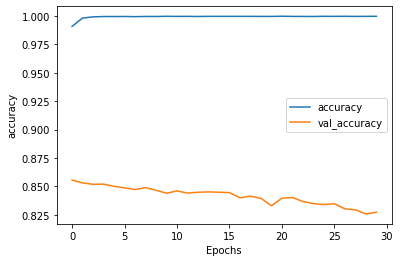

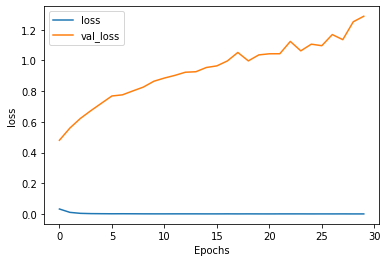

In [46]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [47]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [48]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [49]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [51]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trucn_type)


[[9.9992549e-01]
 [3.7701109e-06]]


In [56]:
prediction = model.predict(padded)
labels = (prediction > 0.5).astype(np.int)
labels.squeeze()

array([1, 0])